In [1]:
%load_ext tikzmagic

# Hardware Basics
- CPU
- Disks
- Periphrials
- Device Ctlrs
    - SATA
    - USB
- Main Memory
- System Bus

## Device Controllers
Specific hardware that does IO

- Has a local buffer
- Managed by software 
- Input moves data from device to buffer
- Output moves data from the buffer to the device
- CPU moves data between buffer and SysMem
- Once the ctlr finishes work, sends an interput to the CPU

## Interrupts
Happen within the CPU. Caused by...
- Errors in execution (div by 0)
- Requested service from the system
- SysCalls
- SMM
- etc

## Modes
For the purposes of this course we're ignoring SMM, Hypervisor, ring 1 and ring 2

- Kernel mode (ring 0)
- User mode (ring 3)

Ring 3 has extra protections, ring 0 has access to privliged operations (IE: direct I/Os)

# Operating System Basics
- Kernel: Core part of the OS, always in memory
- Userspace Programs: Sit on the disk until needed

# Interupt Servicing
1. Interupt is recieved by the CPU
1. Suspend execution of usermode programs
1. Push registers
1. Delegate interupt to the kernel if applicable (IE: SMM interupts aren't)
1. Kernel determines the kind of interupt, follows the entry in the interrupt service vector (loading code from disk if needed)
1. Pop registers

# Storage Tiering
| Tier          | Capacity | Access Time     | Volitile? |
|:--------------|:---------|:----------------|:----------|
| CPU Regs      | ~1KB     | 1 Cycle (~1ns)  | Yes       |
| CPU L1 Cache  | ~256KB   | 5ns             | Yes       |
| CPU L2 Cache  | ~1MB     | 7ns             | Yes       |
| CPU L3 Cache  | ~8MB     | 100ns           | Yes       |
| System Memory | ~16GB    | ~3ms            | Yes       |
| Disks         | ~4TB     | ~10ms           | No        |
| Tapes         | Many PB  | Minutes at best | No        |

Memory on disks is divided into blocks, which are either 512B and 4K depending on the disk

- Caching: Moving data from a slower meduim to a faster one

# Syscalls
Interface provided by the OS to user programs. Allows said programs to request a ring0 service

- Very efficient
- Written in asm, C, or maybe C++

# APIs
Application programming interface

Syscalls are hard and will frequently be wrapped in an API that a program will use

APIs in this case will translate the developer-friendly call to the syscall

Also may offer some cross-platform compatibility

# Important and Notable APIs
- POSIX: Unix/Linux system standard. Set by IEEE
- Win32/Windows API: Used for MS Windows, set by MS
- Java: Used for the JVM. Write once, crash everywhere!

User invokes a program -> Program invokes an api func -> API invokes a syscall -> kernel returns result to API -> API returns result to user prog

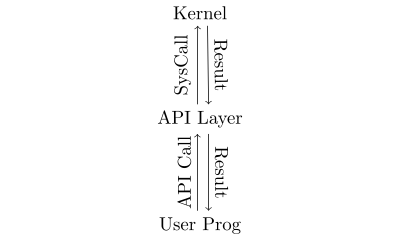

In [2]:
%%tikz -f svg -l positioning
\node at (0,0) (prog) {User Prog};
\node at (0,2) (api) {API Layer};
\node at (0,4) (kern) {Kernel};

\draw [->] (prog.100) -- (api.260) node [midway, above, sloped] (apicall) {API Call};
\draw [->] (api.100) -- (kern.260) node [midway, above, sloped] (syscall) {SysCall};
\draw [->] (kern.300) -- (api.60) node [midway, above, sloped] (sysresult) {Result};
\draw [->] (api.300) -- (prog.60) node [midway, above, sloped] (apiresult) {Result};